In [1]:
# multidimensional arrays
import numpy as np
import math
import pandas as pd
from scipy import stats
from scipy.stats import norm

# inline plots
import matplotlib.pyplot as plt
%matplotlib inline

# nicer figures
import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

## <span style="color:blue"> Exercise 1.1</span>

In [2]:
#read values and associated errors

x = np.arange(10000,1010000,10000) #sequence of throws from 10000 to 1000000
y=[]
err=[]
with open("ave.out") as f:
    content = f.read().splitlines() 
with open("err.out") as t:
    content_1 = t.read().splitlines()
with open("sig2.out") as g:
    content_2 = g.read().splitlines()
with open("err_sig2.out") as h:
    content_3 = h.read().splitlines()    

In [3]:
#convert to float

y=np.array(content)
y=y.astype(float)
err=np.array(content_1)
err=err.astype(float)

sigma_2=np.array(content_2)
sigma_2=sigma_2.astype(float)
err_s=np.array(content_3)
err_s=err_s.astype(float)

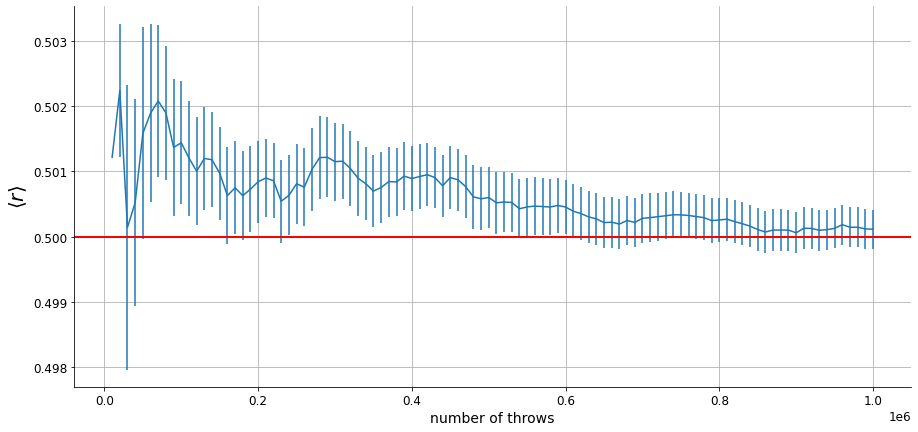

In [4]:
#exercise number 1, average <r>
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.axhline(    
    0.5,
    c='r', lw=2,label="Expected average")
ax.errorbar(x,y,yerr=err)
ax.set_xlabel('number of throws')
ax.set_ylabel(r'$\langle r \rangle$', size=20)
ax.grid(True)

The graph above shows the block averages of a sample of uniform random generator between 0 and 1, as a function of the number of throws involved in the average.
The plotted values come from $10^6$ extractions, divided into 100 blocks.
In the plot we can see that, while the number of throws grows, the quantity $\langle r \rangle$ approaches 0.5. By the right end of the graph, we can say that the value of $\langle r \rangle$ is consistent with the expected 1/2 because the difference is less than the error. The error seems plausible, since the variations of $\langle r \rangle$ are approximately as large as the bar of error.

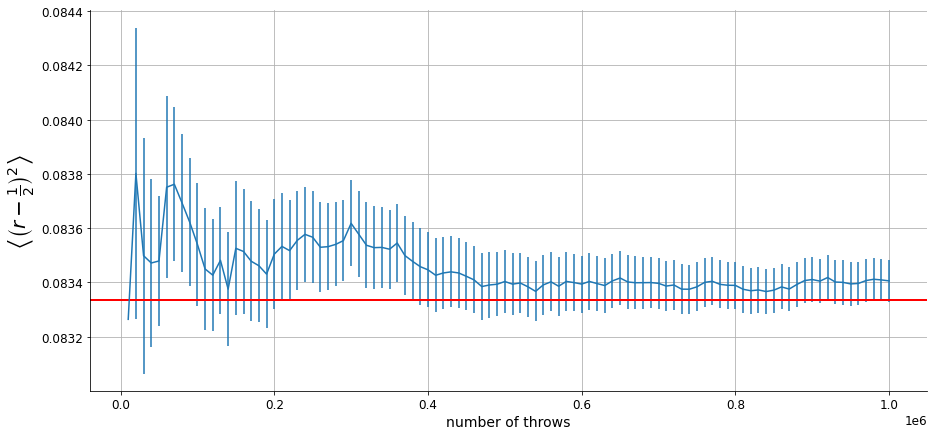

In [5]:
#exercise number 2, estimation of sigma squared
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.axhline(    
    1/12,
    c='r', lw=2,label="Expected average")
ax.errorbar(x,sigma_2,yerr=err_s,)
ax.set_xlabel('number of throws')
ax.set_ylabel(r'$\left\langle \left(r-\frac{1}{2}\right)^2 \right\rangle$', size=20)
ax.grid(True)

The graph above shows the block averages of $\langle (r  - \frac {1}{2})^2 \rangle$, sampled from a uniform random generator, as a function of the number of throws involved in the average.
The plotted values come from $10^6$ extractions, divided into 100 blocks.
From the plot we can say that the value of $\langle (r  - \frac {1}{2})^2 \rangle$ is consistent with the expected 1/12 because the difference is less than the error. The error seems to represent appropriately the variations of the value.

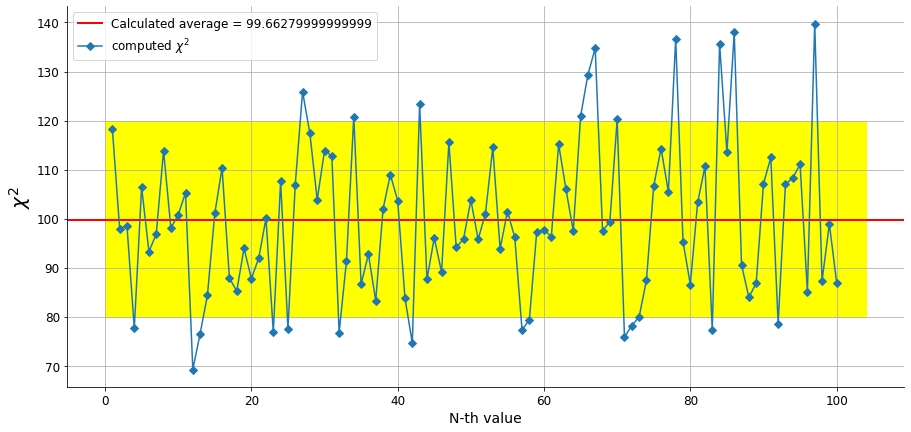

In [9]:
#exercise number 3, estimation of chi squared
x=np.arange(1,101,1)
x2=np.arange(0,105,1)
with open("chi_squared.txt") as f:
    content = f.read().splitlines()
y=np.array(content)
y=y.astype(float)
fig, ax = plt.subplots(1, 1, figsize=(15,7))
ax.axhline(    
    np.mean(y),
    c='r', lw=2,label="Calculated average = "+str(np.mean(y)))
ax.plot(x,y, marker='D', label=r"computed $\chi ^2$")
ax.set_xlabel('N-th value')
ax.set_ylabel(r'$\chi^2$', size=20)
ax.fill_between(x2, 80,120, color='yellow')
ax.legend()
ax.grid(True)

The chi square test aims at checking the uniformity of the distribution. We shall expect that every bin has roughly the same counts, if the distribution is really uniform.
The plot shows that this hypotesis is plausible, since the value of chi square oscillates around the expected value of 100. The fluctuations are approximately $\pm20$ units around 100 (highlighted region in yellow), which is about $2\sigma$: we saw that $\sigma^2 \simeq \langle X \rangle$, so $\sigma \simeq 10$.

## <span style="color:blue"> Exercise 1.2</span>

In [11]:
# read data from dice.csv

uniform_dice, exponential_dice, cauchylorentz_dice = np.genfromtxt('dice.csv', dtype=float, delimiter=',', unpack=True)

N = [1, 2, 10, 100]

FIT PARAMETERS:	mu = 0.5000108001 	sigma = 0.029037794697737294


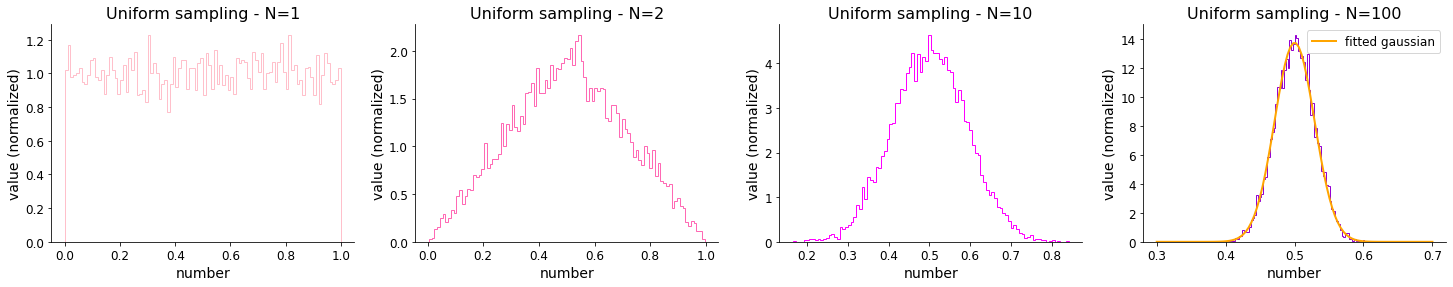

In [22]:
#plot uniform dice

n_bins = 100

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 4))

n, bins, patches = ax1.hist(uniform_dice[0:10000], n_bins, color='pink', density=True,histtype='step')
n, bins, patches = ax2.hist(uniform_dice[10000:20000], n_bins, color='hotpink', density=True,histtype='step')
n, bins, patches = ax3.hist(uniform_dice[20000:30000], n_bins, color='fuchsia', density=True,histtype='step')
n, bins, patches = ax4.hist(uniform_dice[30000:40000], n_bins, color='darkviolet', density = True,histtype='step')

for i in range(4):
    globals()['ax'+str(i+1)].set_title(f'Uniform sampling - N={N[i]}')
    globals()['ax'+str(i+1)].set_xlabel(f'number')
    globals()['ax'+str(i+1)].set_ylabel(f'value (normalized)')

# gaussian fit
mu, std = norm.fit(uniform_dice[30000:40000])

x = np.linspace(0.3, 0.7, 100)
p = norm.pdf(x, mu, std)
ax4.plot(x, p, color='orange', linewidth=2, label='fitted gaussian')
ax4.legend()

print('FIT PARAMETERS:\tmu =', mu, '\tsigma =', std)

FIT PARAMETERS:	mu = 0.9998264965999999 	sigma = 0.09851158906206817


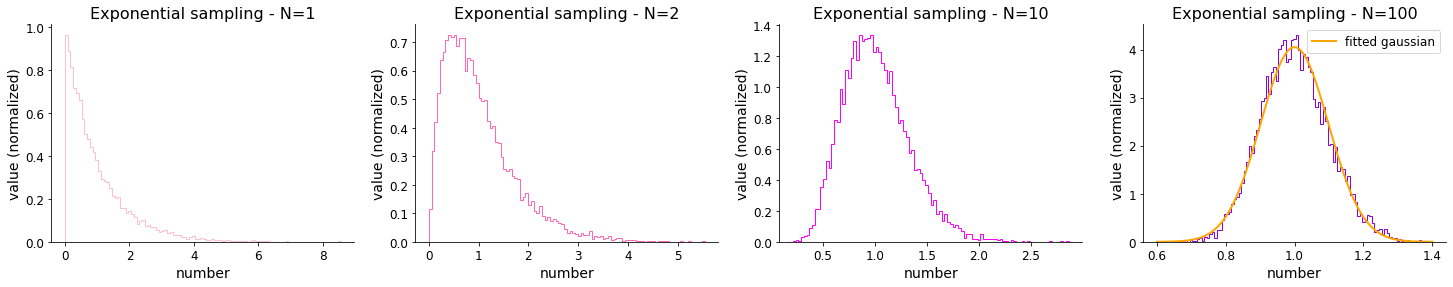

In [23]:
#plot exponential dice

n_bins = 100

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 4))

n, bins, patches = ax1.hist(exponential_dice[0:10000], n_bins, color='pink', density=True,histtype='step')
n, bins, patches = ax2.hist(exponential_dice[10000:20000], n_bins, color='hotpink', density=True,histtype='step')
n, bins, patches = ax3.hist(exponential_dice[20000:30000], n_bins, color='fuchsia', density=True,histtype='step')
n, bins, patches = ax4.hist(exponential_dice[30000:40000], n_bins, color='darkviolet', density=True,histtype='step')

for i in range(4):
    globals()['ax'+str(i+1)].set_title(f'Exponential sampling - N={N[i]}')
    globals()['ax'+str(i+1)].set_xlabel(f'number')
    globals()['ax'+str(i+1)].set_ylabel(f'value (normalized)')
    
# gaussian fit
mu, std = norm.fit(exponential_dice[30000:40000])

x = np.linspace(0.6, 1.4, 100)
p = norm.pdf(x, mu, std)
ax4.plot(x, p, color='orange', linewidth=2, label='fitted gaussian')
ax4.legend()

print('FIT PARAMETERS:\tmu =', mu, '\tsigma =', std)

FIT PARAMETERS:	mu = -0.010155445369008923 	gamma = 1.0041842049789673


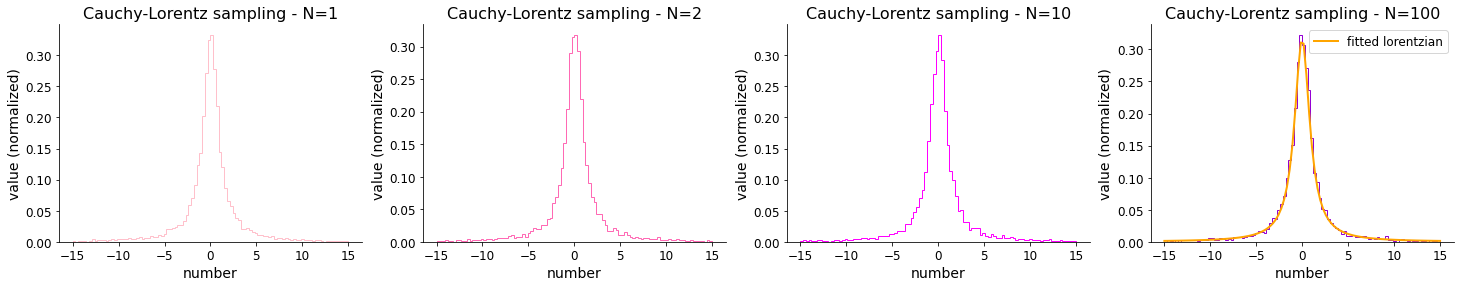

In [24]:
#plot cauchy-lorentz dice

n_bins = 100

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 4))

n, bins, patches = ax1.hist(cauchylorentz_dice[0:10000], n_bins, range=(-15, 15), color='pink', density=True,histtype='step')
n, bins, patches = ax2.hist(cauchylorentz_dice[10000:20000], n_bins, range=(-15, 15), color='hotpink', density=True,histtype='step')
n, bins, patches = ax3.hist(cauchylorentz_dice[20000:30000], n_bins, range=(-15, 15), color='fuchsia', density=True,histtype='step')
n, bins, patches = ax4.hist(cauchylorentz_dice[30000:40000], n_bins, range=(-15, 15), color='darkviolet', density=True,histtype='step')

for i in range(4):
    globals()['ax'+str(i+1)].set_title(f'Cauchy-Lorentz sampling - N={N[i]}')
    globals()['ax'+str(i+1)].set_xlabel(f'number')
    globals()['ax'+str(i+1)].set_ylabel(f'value (normalized)')

# cauchy fit
mu, gamma = stats.cauchy.fit(cauchylorentz_dice[30000:40000])

x = np.linspace(-15, 15, 100)
p = stats.cauchy.pdf(x, mu, gamma)
ax4.plot(x, p, color='orange', linewidth=2, label='fitted lorentzian')
ax4.legend()

print('FIT PARAMETERS:\tmu =', mu, '\tgamma =', gamma)

This exercise shows the central limit theorem in action.
For the first two distributions (uniform and exponential) we see that the shape of the distribution approaches that of a gaussian as the number of values used to compute the average increases from 0 to 40000. The third distribution (lorentzian), on the contrary, does not approach a gaussian, but remains a lorentzian, with the same parameters.
This is exactly what we should expect: both exponential and uniform distributions respect the theorem and their basin of attraction is the gaussian distribution. The lorentzian also respects the theorem but does not converge to a gaussian: its basin of attraction is the distribution itself.

## <span style="color:blue"> Exercise 1.3</span>

In [25]:
#let's unpack the data and errors

file = "data_pi.csv"
prog_pi , prog_error  = np.loadtxt( file , dtype = float , delimiter = "," , usecols=(0,1) , unpack='true')
x=np.arange(len(prog_pi))+1

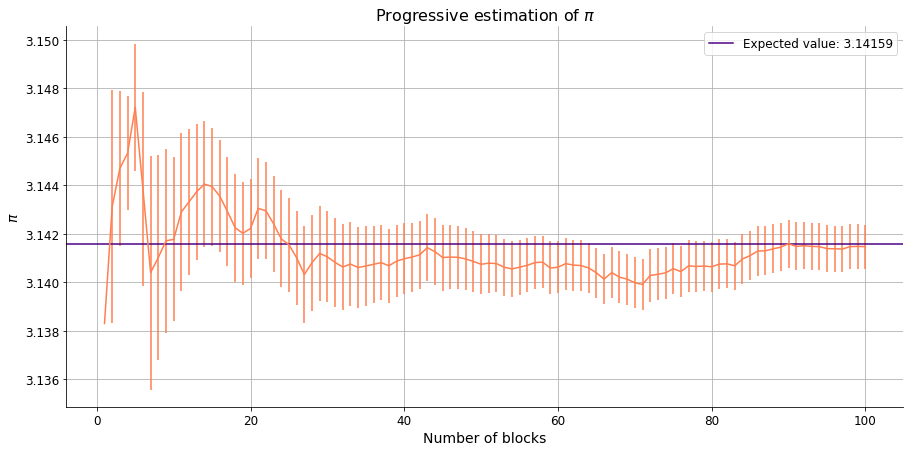

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(15,7))
plt.errorbar( x , prog_pi , yerr=prog_error ,  color="coral" )
plt.axhline(np.pi, color="indigo" , linestyle="solid" , label="Expected value: "+str(round(np.pi, 5)) )
plt.xlabel('Number of blocks')
plt.ylabel(r"$\pi$")
plt.title(r"Progressive estimation of $\pi$")
plt.legend(loc="best")
plt.grid(True)
plt.show()

The figure represents the progressive estimate of the value of $ \pi $ in the blocks. The estimate in each block was obtained by throwing the needle $ 10 ^ 5 $ times. The a priori value of $ \pi $ was not used in the code, to sample $ \sin (\theta) $ we extracted two random numbers $ u \in [-1,1] $ and $ v \in [ 0,1] $, from which $\sin(\theta) = \frac{2uv}{(u^2+v^2)} $ is calculated.
It is not necessary to use several needles, but it is enough to use only one, since the problem has translational invariance along the y axis, that is, all cases can be traced back to this case by means of a translation. It was not even necessary to extract the position in x of the bar as the only data of interest is the intersection. To throw a needle, I uniformly extracted the y coordinate of one end of the interval (0,1), and the y of the other end is obtained by sampling the $ \sin(\theta) $. At this point it is easy to determine if the intersection with the horizontal line occurs or not by using the floor and ceiling function: if we apply the floor function to the biggest of the two y values and the ceiling function to the minimum instead, we can know if the needle intersects (if the two values are the same) or not (if the two values are different).
We can see that our estimation is pretty consistent because the discrepancy between the expected and calculated values are well within the error bars.